In [2]:
# Import necessary libraries: pandas, numpy, matplotlib, and yfinance
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf
from datetime import datetime

# Step 1: Load the data
# Load the data from yfinance into a pandas DataFrame

tick = yf.Ticker("SPY")
end_date = datetime.now().strftime('%Y-%m-%d')
data = tick.history(start='2022-01-01',end=end_date)

# Preview the data to ensure it's loaded correctly!
print(data.head())

                                 Open        High         Low       Close  \
Date                                                                        
2022-01-03 00:00:00-05:00  457.366352  458.854755  455.013761  458.720306   
2022-01-04 00:00:00-05:00  460.170278  460.900076  456.674960  458.566650   
2022-01-05 00:00:00-05:00  458.192212  458.979623  449.665200  449.761230   
2022-01-06 00:00:00-05:00  449.290683  452.104204  446.928451  449.338684   
2022-01-07 00:00:00-05:00  449.348272  450.548583  446.179435  447.562195   

                              Volume  Dividends  Stock Splits  Capital Gains  
Date                                                                          
2022-01-03 00:00:00-05:00   72668200        0.0           0.0            0.0  
2022-01-04 00:00:00-05:00   71178700        0.0           0.0            0.0  
2022-01-05 00:00:00-05:00  104538900        0.0           0.0            0.0  
2022-01-06 00:00:00-05:00   86858900        0.0           0.0    

In [3]:

# Step 2: Data Cleaning
# Check for missing values in the DataFrame
data.ffill
data['null_count'] = data.isna().sum(axis=1)

# Fill In Missing Values:
data.fillna('NaN')



,Open,High,Low,Close,Volume,Dividends,Stock Splits,Capital Gains,null_count
Date,,,,,,,,,
2022-01-03 00:00:00-05:00,457.366352,458.854755,455.013761,458.720306,72668200,0.0,0.0,0.0,0
2022-01-04 00:00:00-05:00,460.170278,460.900076,456.674960,458.566650,71178700,0.0,0.0,0.0,0
2022-01-05 00:00:00-05:00,458.192212,458.979623,449.665200,449.761230,104538900,0.0,0.0,0.0,0
2022-01-06 00:00:00-05:00,449.290683,452.104204,446.928451,449.338684,86858900,0.0,0.0,0.0,0
2022-01-07 00:00:00-05:00,449.348272,450.548583,446.179435,447.562195,85111600,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...
2024-12-02 00:00:00-05:00,602.969971,604.320007,602.469971,603.630005,31746000,0.0,0.0,0.0,0
2024-12-03 00:00:00-05:00,603.390015,604.159973,602.340027,603.909973,26906600,0.0,0.0,0.0,0
2024-12-04 00:00:00-05:00,605.630005,607.909973,604.950012,607.659973,42787600,0.0,0.0,0.0,0


In [4]:

# Step 3: Strategy: Linear Regression indicator

def calculate_linreg(data, window, linreg_column):

  values_list = [0] * window

  point = 0.0000
  # Calculate the linear regression for the specified window
  #each row needs to pull the last window number of prices and create a new dataframe
  for current_row in range(window, len(data)):

    if current_row < window:
      point = 0

    else:
      #making the dataframe with all the parameters required
      lindata = pd.DataFrame({'price': data['Close'].iloc[current_row - window:current_row].values})
      lindata['index'] = range(1, window+1)
      lindata['pricetime'] = lindata['price'] * lindata['index']
      lindata['sqindex'] = lindata['index'] ** 2

      #implementing the regression formlua for slope and intercept
      slope = (window * lindata['pricetime'].sum() - lindata['price'].sum() * lindata['index'].sum()) / (window * lindata['sqindex'].sum() - (lindata['index'].sum()) ** 2)
      intercept = (lindata['price'].sum() - slope * lindata['index'].sum())/window
      point = slope * (window) + intercept

    values_list.append(point)

    # this will put the linreg value at the given row
  data[linreg_column] = values_list
  return data
#get the linear regression values for different time frames
data = calculate_linreg(data, 40, 'st_linreg')
data = calculate_linreg(data, 120, 'lt_linreg')

print(data.tail())



                                 Open        High         Low       Close  \
Date                                                                        
2024-12-02 00:00:00-05:00  602.969971  604.320007  602.469971  603.630005   
2024-12-03 00:00:00-05:00  603.390015  604.159973  602.340027  603.909973   
2024-12-04 00:00:00-05:00  605.630005  607.909973  604.950012  607.659973   
2024-12-05 00:00:00-05:00  607.659973  608.479980  606.299988  606.659973   
2024-12-06 00:00:00-05:00  607.440002  609.070007  607.020020  607.809998   

                             Volume  Dividends  Stock Splits  Capital Gains  \
Date                                                                          
2024-12-02 00:00:00-05:00  31746000        0.0           0.0            0.0   
2024-12-03 00:00:00-05:00  26906600        0.0           0.0            0.0   
2024-12-04 00:00:00-05:00  42787600        0.0           0.0            0.0   
2024-12-05 00:00:00-05:00  28762200        0.0           0.0     

In [8]:
# Step 4: signals
# now we must create signals for activity
# when the VIX column is true, the signal sohuld be NULL
# when the VIX column is false, price>st_linreg, and lt_linreg(n)>lt_linreg(n-1), generate a buy signal
# VIX = false, and lt_linreg(n)<lt_linreg(n-1) OR st_linreg(n)<stLlinreg(n-1), generate a sell signal
def generate_signals(data):
  signal_list = [0]
  inticator = 0

  for current_row in range(1, len(data)):
    #buy signal
    if data['Close'].iloc[current_row] > data['st_linreg'].iloc[current_row] and data['lt_linreg'].iloc[current_row] > data['lt_linreg'].iloc[current_row - 1]:
      indicator = 1
    #sell signal
    elif data['st_linreg'].iloc[current_row] < data['st_linreg'].iloc[current_row - 1] or data['lt_linreg'].iloc[current_row] < data['lt_linreg'].iloc[current_row - 1]:
      indicator = -1
    else:
      indicator = 0
    signal_list.append(indicator)

  data['Signal'] = signal_list

  return data

data = generate_signals(data)

print(data.tail())

                                 Open        High         Low       Close  \
Date                                                                        
2024-12-02 00:00:00-05:00  602.969971  604.320007  602.469971  603.630005   
2024-12-03 00:00:00-05:00  603.390015  604.159973  602.340027  603.909973   
2024-12-04 00:00:00-05:00  605.630005  607.909973  604.950012  607.659973   
2024-12-05 00:00:00-05:00  607.659973  608.479980  606.299988  606.659973   
2024-12-06 00:00:00-05:00  607.440002  609.070007  607.020020  607.809998   

                             Volume  Dividends  Stock Splits  Capital Gains  \
Date                                                                          
2024-12-02 00:00:00-05:00  31746000        0.0           0.0            0.0   
2024-12-03 00:00:00-05:00  26906600        0.0           0.0            0.0   
2024-12-04 00:00:00-05:00  42787600        0.0           0.0            0.0   
2024-12-05 00:00:00-05:00  28762200        0.0           0.0     

**For the future**

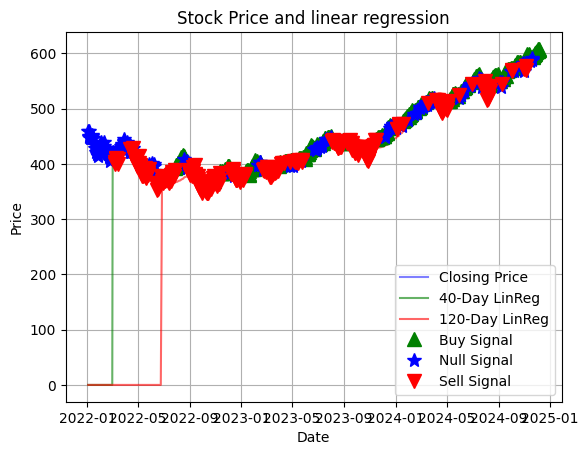

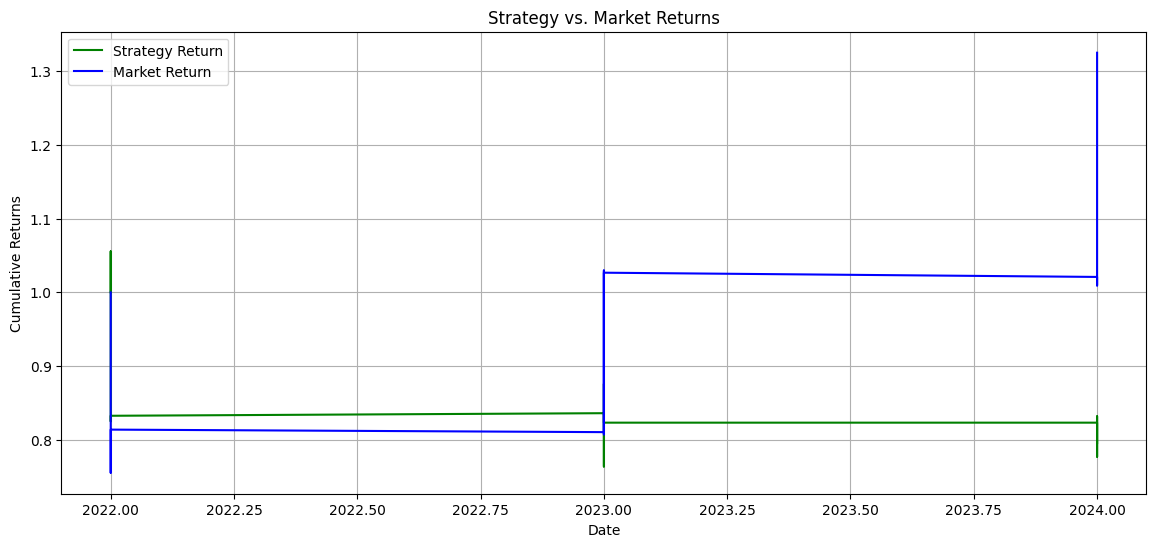

In [10]:

# Step 5: Backtesting the Strategy
# --------------------------------
# Now that we have buy and sell signals, let's simulate a basic backtesting approach.
# The goal is to see how the strategy performs by calculating returns.

def backtest_strategy(data):
    # Calculate daily returns based on the 'Close' price
    data['Daily_Return'] = data['Close'].pct_change()

    # Calculate strategy returns: if we are in a buy (1), take the return, else 0
    data['Strategy_Return'] = data['Daily_Return'] * data['Signal'].shift(1)

    # Calculate the cumulative return over the period (this gives a sense of strategy performance)
    data['Cumulative_Strategy_Return'] = (1 + data['Strategy_Return']).cumprod()

    # Similarly, calculate the cumulative return of simply holding the stock
    data['Cumulative_Market_Return'] = (1 + data['Daily_Return']).cumprod()

    return data

# Backtest the strategy
data = backtest_strategy(data)

# Step 6: Visualizing the Results
# -------------------------------
# We'll plot the stock price, the two SMAs, and the buy/sell signals, as well as strategy vs. market returns.

def plot_data(data):



    # Plot the closing price
    plt.plot(data.index, data['Close'], label='Closing Price', color='blue', alpha=0.5)

    # plot the linregs
    plt.plot(data.index, data['st_linreg'], label='40-Day LinReg', color='green', alpha=0.6) # Replaced with the columns for linear regression
    plt.plot(data.index, data['lt_linreg'], label='120-Day LinReg', color='red', alpha=0.6)   # Replaced with the columns for linear regression


    # Highlight buy signals
    plt.plot(data.index[data['Signal'] == 1], data['Close'][data['Signal'] == 1], '^', markersize=10, color='g', lw=0, label='Buy Signal')

    # highlight null signals
    plt.plot(data.index[data['Signal'] == 0], data['Close'][data['Signal'] == 0], '*', markersize=10, color='b', lw=0, label='Null Signal')

    # Highlight sell signals
    plt.plot(data.index[data['Signal'] == -1], data['Close'][data['Signal'] == -1], 'v', markersize=10, color='r', lw=0, label='Sell Signal')

    # Add titles and labels
    plt.title('Stock Price and linear regression')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid()

    # Show the plot
    plt.show()

# Plot the results
plot_data(data)

# Plot the cumulative returns of the strategy vs. the market
def plot_returns(data):
    plt.figure(figsize=(14, 6))
    d = [pd.Timestamp(x) for x in data.index]
    dates = []
    for i in range(len(d)):
        dates.append(d[i].year)
    # Plot cumulative returns
    plt.plot(dates, data['Cumulative_Strategy_Return'], label='Strategy Return', color='green')
    plt.plot(dates, data['Cumulative_Market_Return'], label='Market Return', color='blue')

    # Add titles and labels
    plt.title('Strategy vs. Market Returns')
    plt.xlabel('Date')
    plt.ylabel('Cumulative Returns')
    plt.legend()
    plt.grid()

    # Show the plot
    plt.show()

# Plot strategy vs market returns
plot_returns(data)

# Step 7: Conclusion
# ------------------
# This code outlines a full process from loading and cleaning the stock data to implementing an SMA-based trading strategy.
# You can adjust window sizes and further tune the strategy based on additional technical indicators or combine it with other models.